# Word2Vec

In [ ]:
#updating gensim and numpy to run Word2Vec library function
!pip install --upgrade gensim
!pip3 install numpy==1.23.5

In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download("popular")
import re

import string
import matplotlib.pyplot as plt


from nltk.corpus import stopwords
from nltk import word_tokenize
from sklearn.decomposition import PCA

# constants
sw = stopwords.words('english')
#adding more stopwords w.r.t. the data
sw.extend(['http', 'get', 'amp', 'co', 'need','coronavirus','coronaviruspandemic','stock', 'like', 'go', 'time', 'please','going', 'yet', 'though', 'cause', 'isnt', 'were', 'making' ])
sw.sort()

# constants
PATH = 'Corona_NLP_test_.txt'
plt.style.use('ggplot')

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category = DataConversionWarning)


import nltk
nltk.download('punkt_tab')
# import data
lines = []
with open(PATH, 'r') as f:
    for l in f:
        lines.append(l)

#lines['text']=lines['text'].astype(str)

# remove new lines
lines = [line.rstrip('\n') for line in lines]

# make all characters lower
lines = [line.lower() for line in lines]

# remove punctuations from each line
lines = [line.translate(str.maketrans('', '', string.punctuation)) for line in lines]

# tokenize
lines = [word_tokenize(line) for line in lines]


def remove_stopwords(lines, sw = sw):
    '''
    The purpose of this function is to remove stopwords from a given array of
    lines.

    params:
        lines (Array / List) : The list of lines you want to remove the stopwords from
        sw (Set) : The set of stopwords you want to remove

    example:
        lines = remove_stopwords(lines = lines, sw = sw)
    '''

    res = []
    for line in lines:
        original = line
        line = [w for w in line if w not in sw]
        if len(line) < 1:
            line = original
        res.append(line)
    return res

filtered_lines = remove_stopwords(lines = lines, sw = sw)
#filtered_lines

from gensim.models import Word2Vec as w2v

#min_count = 3 in case of real-life datasets, for sample small datasets min_count=1

w = w2v(
    filtered_lines,
    min_count=1,
    sg = 1,
    window=7
)

#print(w.wv.most_similar('three'))

emb_df = (
    pd.DataFrame(
        [w.wv.get_vector(str(n)) for n in w.wv.key_to_index],
        index = w.wv.key_to_index
    )
)
print(emb_df.shape)
emb_df.head(50)

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

(14605, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
covid19,-0.032604,0.257870,0.132136,0.153670,-0.123277,-0.502487,0.172469,0.633072,-0.248126,-0.180994,...,0.339498,0.181586,0.104747,0.173379,0.568502,0.261111,0.056665,-0.080596,-0.048463,-0.072097
food,-0.091412,0.209322,0.085095,0.252552,0.038168,-0.497736,0.049761,0.621761,-0.256360,-0.349293,...,0.337994,-0.080769,0.118492,0.009454,0.498207,0.163039,0.067968,-0.158113,-0.046261,0.092941
people,0.013153,0.234206,0.093994,0.105332,-0.111691,-0.522382,0.179045,0.677308,-0.256038,-0.295243,...,0.486034,0.117330,0.131274,0.151794,0.552999,0.274665,0.063007,-0.115974,-0.032293,-0.073942
grocerystore,0.028747,0.294622,0.237029,0.080136,-0.084367,-0.571790,0.269593,0.629153,-0.152124,-0.311242,...,0.456404,0.143034,0.117653,0.204700,0.587782,0.319127,0.177767,-0.114583,-0.058425,-0.099308
panicbuying,-0.049819,0.199879,0.108939,0.169950,-0.133688,-0.492947,0.227433,0.665402,-0.280236,-0.333497,...,0.575083,0.114682,0.109486,0.210742,0.632395,0.270118,0.065102,-0.067931,-0.075332,-0.072859
onlineshopping,-0.278669,0.380937,0.074643,-0.136916,-0.296752,-0.583378,0.387494,0.773788,-0.259954,-0.213737,...,0.507280,0.349978,-0.102611,-0.025659,0.480349,0.341336,-0.030108,-0.219455,-0.089119,-0.291907
supermarket,0.068709,0.254897,0.236926,0.121223,-0.066016,-0.549430,0.317740,0.611920,-0.192131,-0.319976,...,0.470605,0.151503,0.102140,0.267402,0.606674,0.384748,0.180240,-0.093110,-0.095386,-0.106102
toiletpaper,0.228495,0.242106,0.381705,0.199483,-0.070208,-0.526758,0.113257,0.758395,-0.041662,-0.534449,...,0.538215,0.093139,0.120914,0.094186,0.757043,0.175769,0.127373,-0.146893,-0.026479,0.101239
prices,-0.000897,0.551390,0.325588,0.003261,-0.016559,-0.455095,0.095233,0.581746,-0.173984,-0.104799,...,0.074618,0.256585,0.057982,-0.153350,0.516757,0.025444,0.151856,-0.109265,-0.014590,-0.036316
stockup,-0.031034,0.179102,0.015485,0.249582,-0.063771,-0.484598,0.079323,0.665763,-0.283461,-0.367661,...,0.405708,0.022939,0.160048,0.117048,0.681563,0.147905,-0.006177,-0.072856,0.055785,0.080475


In [ ]:
# Calculate the average vector for the entire corpus
def get_document_vector(model, filtered_lines):
    return np.mean([model.wv[word] for line in filtered_lines for word in line if word in model.wv], axis=0)

# Calculate cosine similarity between two vectors
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

# Get the document vector
doc_vector = get_document_vector(w, filtered_lines)

# Calculate similarity scores for each word
word_scores = {}
for word in w.wv.key_to_index:
    word_vector = w.wv[word]
    similarity = cosine_similarity(word_vector, doc_vector)
    word_scores[word] = similarity

# Sort words by similarity score and get top 15
top_keywords_word2vec = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:10]

# Extract just the words into a list
top_words_word2vec = [word for word, score in top_keywords_word2vec]

# Print the list of top 10 keywords
print("Top 10 Keywords Extracted using Word2Vec:")
for i in range(len(top_words_word2vec)):
  print(top_words_word2vec[i], end ="\n")

Top 10 Keywords Extracted using Word2Vec:
shit
struggling
apocalypse
nothing
stupid
tell
places
anyone
try
calm


# TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

plt.style.use('ggplot')

# constants
PATH = 'Corona_NLP_test_.txt'
plt.style.use('ggplot')

lines = []
with open(PATH, 'r') as f:
    for l in f:
        lines.append(l)


 # Cleaning the texts

ps = PorterStemmer()
wordnet=WordNetLemmatizer()
corpus = []
for i in range(len(lines)):
    review = re.sub('[^a-zA-Z]', ' ', lines[i])
    review = review.lower()
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in set(sw)]
    review = ' '.join(review)
    corpus.append(review)

# Creating the TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
cv = TfidfVectorizer(ngram_range=(1,1))
corpus1 = cv.fit_transform(corpus)
avg = corpus1.mean(axis=0)
avg = pd.DataFrame(avg, columns=sorted(cv.vocabulary_.keys()))
avg=avg.T
avg=avg.rename(columns={0:'score'})
avg['word']=avg.index
avg=avg.sort_values('score', ascending=False)
avg=avg[:50]

cv_bigram = TfidfVectorizer(ngram_range=(3,3))
corpus1_bigram= cv_bigram.fit_transform(corpus)
avg_bigram=corpus1_bigram.mean(axis=0)
avg_bigram= pd.DataFrame(avg_bigram, columns=sorted(cv_bigram.vocabulary_.keys()))
avg_bigram=avg_bigram.T
avg_bigram=avg_bigram.rename(columns={0:'score'})
avg_bigram['word']=avg_bigram.index
avg_bigram=avg_bigram.sort_values('score', ascending=False)

unigrams_list=avg['word'].tolist()
bigrams_list=avg_bigram['word'].tolist()

def convert(lst):
  return ([item.split() for item in lst])

bigrams_split=convert(bigrams_list)

check =pd.DataFrame(columns=['topic','subtopic'])

for i in unigrams_list:
  counter =0
  for j in bigrams_split:
    if counter<5 and (i==j[0] or i==j[1] or i==j[2]):
      bigram_words=' '.join(j)
      check = pd.concat([check, pd.concat([pd.Series(i,name='topic'),pd.Series(bigram_words,name='subtopic')],axis=1)], axis=0)
      counter = counter+1

tf_idf_keywords = avg.head(10)
print("Top 10 Keywords Extracted using tf-idf:")
print(tf_idf_keywords['score'], tf_idf_keywords['word'])

Top 10 Keywords Extracted using tf-idf:
covid             0.038151
http              0.021463
food              0.015465
onlineshopping    0.014054
panicbuying       0.009787
people            0.009619
grocerystore      0.009515
supermarket       0.008465
toiletpaper       0.007756
price             0.006992
Name: score, dtype: float64 covid                      covid
http                        http
food                        food
onlineshopping    onlineshopping
panicbuying          panicbuying
people                    people
grocerystore        grocerystore
supermarket          supermarket
toiletpaper          toiletpaper
price                      price
Name: word, dtype: object


# Value of Constraint a

In [ ]:
ans = avg.head(20)
#print(ans)

# Calculate the average of the first 20 terms
normalizer_a = ans['score'].head(20).mean()
print(f"Normalizer A: {normalizer_a}")
print(f"1 / Normalizer A: {1/normalizer_a}")

keywords_values = ans['score']*(1.4) / normalizer_a
ans['score'] = keywords_values
print(ans)
word_index = ans['word']

word_index = word_index.to_numpy()
constraint_a = keywords_values.to_numpy()
constraint_a

Normalizer A: 0.009351834945561802
1 / Normalizer A: 106.93088637910364
                    score             word
covid            5.711310            covid
http             3.213040             http
food             2.315180             food
onlineshopping   2.103871   onlineshopping
panicbuying      1.465126      panicbuying
people           1.440012           people
grocerystore     1.424470     grocerystore
supermarket      1.267311      supermarket
toiletpaper      1.161113      toiletpaper
price            1.046687            price
store            1.016875            store
stockup          1.016337          stockup
sanitizer        0.714011        sanitizer
hand             0.635969             hand
supply           0.594707           supply
local            0.590091            local
home             0.580730             home
retail           0.574565           retail
shelf            0.569243            shelf
day              0.559351              day
coronaoutbreak   0.553718

<ipython-input-5-f6f436e4482e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ans['score'] = keywords_values


array([5.71130956, 3.21304028, 2.31518047, 2.10387133, 1.4651263 ,
       1.44001215, 1.42446962, 1.26731119, 1.16111293, 1.04668668,
       1.01687454, 1.01633736, 0.7140107 , 0.63596949, 0.59470737,
       0.59009092, 0.58072994, 0.57456538, 0.56924301, 0.55935078,
       0.55371803, 0.52684222, 0.52233078, 0.51306017, 0.51038597,
       0.49634894, 0.48466835, 0.47819297, 0.47611654, 0.45856125])

# Value of Constraint b

In [ ]:
import numpy as np

con_b = []
words = []  # To store the words for later use

# topn = 100 for finding top 100 most similar words
for word in ans['word']:
    words.append(word)  # Store the word
    if word in w.wv:
        temp = w.wv.most_similar(word, topn=100)
        df_temp = pd.DataFrame(temp, columns=['word', 'score'])
        avg_score = df_temp['score'].mean()  # Average score of top 100 similar words
        con_b.append(avg_score)

# Calculate the average of all averages
normalizer_b = np.mean(con_b)
print(f"\nNormalizer B (Average of averages): {normalizer_b:.6f}")

# Normalize constraint_b
constraint_b = [con*(0.3) / normalizer_b for con in con_b]

print("\nNormalized Constraint B values against words:")
print("Word\t\t\tNormalized Value")
print("-" * 40)
for word, value in zip(words, constraint_b):
    if len(word) > 14:
        print(f"{word}\t {value:.6f}")
    elif len(word) > 8:
        print(f"{word}\t\t {value:.6f}")
    else:
        print(f"{word}\t\t\t {value:.6f}")


Normalizer B (Average of averages): 0.948150

Normalized Constraint B values against words:
Word			Normalized Value
----------------------------------------
covid			 0.289515
http			 0.293017
food			 0.272772
onlineshopping		 0.302310
panicbuying		 0.308144
people			 0.300035
grocerystore		 0.295398
supermarket		 0.295284
toiletpaper		 0.313224
price			 0.299387
store			 0.294134
stockup			 0.278054
sanitizer		 0.282204
hand			 0.314049
supply			 0.299366
local			 0.296477
home			 0.290857
retail			 0.315857
shelf			 0.310742
day			 0.295634
coronaoutbreak		 0.302550
buy			 0.306444
everyone			 0.294471
consumer			 0.303268
work			 0.300594
coronapocalypse	 0.306822
today			 0.314443
week			 0.315350
good			 0.309597


# Using NERS to improve the scaling factor and highlight key entities



In [ ]:
import spacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Function to perform NER on a list of tokens
def identify_entities(tokens):
    text = " ".join(tokens)
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Function to adjust constraints based on entity type, the aim is to identify out of o
def adjust_constraints(word, constraint_a, constraint_b, entities, normalizer_a, normalizer_b):
    important_entities = ["GPE", "ORG", "MONEY", "PRODUCT", "FACILITY"]

    diff_a = 1.4/constraint_a
    diff_b = 0.3/constraint_b

    boost_factor_a = 1
    boost_factor_b = 1

    if diff_a <= 0.5:
      boost_factor_a = 0.25
    elif diff_a <= 0.75:
      boost_factor_a = 0.5
    elif diff_a < 0.95:
      boost_factor_a = 0.75
    elif diff_a >= 1.5:
      boost_factor_a = 1.5
    elif diff_a >= 1.25:
      boost_factor_a = 1.25

    if diff_b <= 0.5:
      boost_factor_b = 0.25
    elif diff_b <= 0.75:
      boost_factor_b = 0.5
    elif diff_b < 0.95:
      boost_factor_b = 0.75
    elif diff_b >= 1.75:
      boost_factor_b = 1.75
    elif diff_b >= 1.5:
      boost_factor_b = 1.55
    elif diff_b >= 1.25:
      boost_factor_b = 1.25

    for entity, label in entities:
        if word.lower() in entity.lower() and label in important_entities:
            constraint_a *= boost_factor_a
            constraint_b *= boost_factor_b
            print(f"Boosted {word} ({label}): a={constraint_a:.6f}, b={constraint_b:.6f}")
            break

    return constraint_a, constraint_b

# Assuming we have the original constraints and words
words = avg['word'].tolist()
original_constraint_a = constraint_a
original_constraint_b = constraint_b

# Identify entities in the entire corpus
all_entities = identify_entities(corpus)

# Adjust constraints for each word
adjusted_constraint_a = []
adjusted_constraint_b = []

for i, word in enumerate(words[:len(original_constraint_b)]):
    a = original_constraint_a[i]
    b = original_constraint_b[i]
    adjusted_a, adjusted_b = adjust_constraints(word, a, b, all_entities, normalizer_a, normalizer_b)
    adjusted_constraint_a.append(adjusted_a)
    adjusted_constraint_b.append(adjusted_b)

# Now use adjusted_constraint_a and adjusted_constraint_b for further processing

Boosted covid (ORG): a=1.427827, b=0.289515
Boosted http (ORG): a=0.803260, b=0.293017
Boosted food (ORG): a=1.157590, b=0.272772
Boosted onlineshopping (ORG): a=1.051936, b=0.302310
Boosted panicbuying (ORG): a=1.465126, b=0.308144
Boosted grocerystore (GPE): a=1.424470, b=0.295398
Boosted toiletpaper (PRODUCT): a=1.161113, b=0.313224
Boosted price (ORG): a=1.308358, b=0.299387
Boosted store (GPE): a=1.271093, b=0.294134
Boosted stockup (ORG): a=1.270422, b=0.278054
Boosted retail (ORG): a=0.861848, b=0.236893
Boosted day (ORG): a=0.839026, b=0.295634
Boosted buy (ORG): a=0.790263, b=0.306444
Boosted consumer (ORG): a=0.769590, b=0.303268
Boosted week (ORG): a=0.717289, b=0.315350


# Lyapunov Exponent

In [ ]:
from numpy import *


class HenonMap:
    """ Class to hold the parameters of the Henon Map and evaluate it along its directional derivative.
        The default parameters are chosen as the canonical ones in the initialization.
        It instantiates a callable object f_df, in such a way that f_df(xy, w)
        returns two values f(xy) and df(xy, w), where
        f(xy) is the Henon map evaluated at the point xy and
        df(xy, w) is the differential of the Henon evaluated at xy in the direction of w.
    """
    def __init__(_, a, b):
        _.a, _.b = a, b

    def f(_, xy):
        x, y = xy
        return array([_.a - x ** 2 + _.b * y, x])

    def df(_, xy, w):
        x, y = xy
        j = array([[-2 * x, _.b],
                   [1, 0]])
        return j @ w

    def __call__(_, xy, w):
        return _.f(xy), _.df(xy, w)



from numpy import *
from numpy.linalg import *


def lyapunov_exponent(f_df, single_initial_condition=None, multiple_initial_conditions=None,
                      tol=0.01, max_it=1000, min_it_percentage=0.1):
    """Numerical approximation of all Lyapunov Exponents of a map.
    Ref: Alligood, Kathleen T., Tim D. Sauer, and James A. Yorke. Chaos. Springer New York, 1996.
    Parameters
    ----------
    f_df : callable
        The map to be considered for computation of Lyapunov Exponents
        f_df (x, w) -> (f(x), df(x, w)), where
        f(x) is the map evaluated at the point x and
        df(x, w) is the differential of this map evaluated at x in the direction of w.
    single_initial_condition : ndarray of shape (n)
        Single initial condition to computed the Lyapunov Exponent.
    multiple_initial_conditions : ndarray of shape (m,n)
        m initial conditions to computed the average Lyapunov Exponent.
    tol : float
        Tolerance to stop the approximation.
    max_it : int
        Max numbers of iterations.
    min_it_percentage : float, optional
        Min number of iterations as a percentage of the max_it.
    Returns
    -------
    : ndarray of shape (n)
        The Lyapunov exponents computed associated to a single initial condition or
        the average value considering several initial conditions
    """

    if multiple_initial_conditions is not None:
        (m, n) = shape(multiple_initial_conditions)
        ls = zeros((m, n))
        for i in range(m):
            ls[i] = lyapunov_exponent(f_df=f_df, single_initial_condition=multiple_initial_conditions[i],
                                      tol=tol, max_it=max_it, min_it_percentage=min_it_percentage)
        return apply_along_axis(lambda v: mean(v), 0, ls)

    elif single_initial_condition is None:
        raise Exception('Either single_initial_condition or multiple_initial_conditions must be provided.')

    n = len(single_initial_condition)
    x = single_initial_condition
    w = eye(n)
    h = zeros(n)
    trans_it = int(max_it * min_it_percentage)
    l = -1

    for i in range(0, max_it):
        x_next, w_next = f_df(x, w)
        w_next = orthogonalize_columns(w_next)

        h_next = h + log_of_the_norm_of_the_columns(w_next)
        l_next = h_next / (i + 1)

        if i > trans_it and norm(l_next - l) < tol:
            return sort(l_next)

        h = h_next
        x = x_next
        w = normalize_columns(w_next)
        l = l_next

    return (-1,-1)
    raise Exception('Lyapunov Exponents computation did no convergence' +
                    ' at ' + str(single_initial_condition) +
                    ' with tol=' + str(tol) +
                    ' max_it=' + str(max_it) +
                    ' min_it_percentage=' + str(min_it_percentage))


def orthogonalize_columns(a):
    q, r = qr(a)
    return q @ diag(r.diagonal())


def normalize_columns(a):
    return apply_along_axis(lambda v: v / norm(v), 0, a)


def log_of_the_norm_of_the_columns(a):
    return apply_along_axis(lambda v: log(norm(v)), 0, a)



import unittest
from numpy import *
from numpy.linalg import *

#HENON_MAP_REFERENCE_SOLUTION = array([-1.61, 0.41])
#TEST_TOLERANCE = 0.01
x_points, y_points = mgrid[-1:1:0.25, -1:1:0.25]
HENON_MAP_INITIAL_CONDITIONS = column_stack((x_points.ravel(), y_points.ravel()))


# Ref: Alligood, Kathleen T., Tim D. Sauer, and James A. Yorke. Chaos. Springer New York, 1996.
#range bound = (1.1,0.4), (1.8,0.1); always chaotic at (1.4,0.3)
henon_values = []
for i in range(0,20):
  HENON_MAP = HenonMap(adjusted_constraint_a [i], adjusted_constraint_b[i])
  a =  lyapunov_exponent(HENON_MAP, multiple_initial_conditions=HENON_MAP_INITIAL_CONDITIONS)
  print(i, ',',a)
  henon_values.append(a)


class LyapunovExponentsTestCase(unittest.TestCase):
    def henon_map_test(_):
        l = lyapunov_exponent(HENON_MAP, multiple_initial_conditions=HENON_MAP_INITIAL_CONDITIONS)
        _.assertEqual(norm(HENON_MAP_REFERENCE_SOLUTION - l, inf) < TEST_TOLERANCE, True)


if __name__ == "__main__":
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

0 , [-1.66792917  0.42838243]
1 , [-0.84396621 -0.3835576 ]
2 , [-1.53277354  0.23365473]
3 , [-1.16970679 -0.02659435]


<ipython-input-8-7e9bdb66b345>:113: RuntimeWarning: divide by zero encountered in log
  return apply_along_axis(lambda v: log(norm(v)), 0, a)
<ipython-input-8-7e9bdb66b345>:109: RuntimeWarning: invalid value encountered in divide
  return apply_along_axis(lambda v: v / norm(v), 0, a)
<ipython-input-8-7e9bdb66b345>:17: RuntimeWarning: overflow encountered in double_scalars
  return array([_.a - x ** 2 + _.b * y, x])
<ipython-input-8-7e9bdb66b345>:23: RuntimeWarning: invalid value encountered in matmul
  return j @ w


4 , [-1.07182306 -0.83818195]
5 , [-1.16001281 -0.64095112]
6 , [-1.64416737  0.42473649]
7 , [-1.28553511  0.06571641]
8 , [-1.42555     0.26471452]
9 , [-1.46551285  0.25949334]
10 , [-1.16553445 -0.05818662]
11 , [-1.56544526  0.28550592]
12 , [-0.6992795  -0.56584552]
13 , [-0.63877786 -0.51942715]
14 , [-0.67583463 -0.53025213]
15 , [-0.68300713 -0.53277909]
16 , [-0.69762176 -0.53730308]
17 , [-1.15900249 -0.28114554]
18 , [-0.65741709 -0.51137409]



----------------------------------------------------------------------
Ran 0 tests in 0.000s

OK


19 , [-1.02001861 -0.19861574]


In [ ]:
#print(henon_values)
for i in range(20):
  if(len(ans['word'][i])>14):
    print(ans['word'][i], "\t", henon_values[i], end = "\n")
  elif(len(ans['word'][i])>6):
    print(ans['word'][i], "\t\t", henon_values[i], end = "\n")
  else:
    print(ans['word'][i], "\t\t\t", henon_values[i], end = "\n")


covid 			 [-1.66792917  0.42838243]
http 			 [-0.84396621 -0.3835576 ]
food 			 [-1.53277354  0.23365473]
onlineshopping 		 [-1.16970679 -0.02659435]
panicbuying 		 [-1.07182306 -0.83818195]
people 			 [-1.16001281 -0.64095112]
grocerystore 		 [-1.64416737  0.42473649]
supermarket 		 [-1.28553511  0.06571641]
toiletpaper 		 [-1.42555     0.26471452]
price 			 [-1.46551285  0.25949334]
store 			 [-1.16553445 -0.05818662]
stockup 		 [-1.56544526  0.28550592]
sanitizer 		 [-0.6992795  -0.56584552]
hand 			 [-0.63877786 -0.51942715]
supply 			 [-0.67583463 -0.53025213]
local 			 [-0.68300713 -0.53277909]
home 			 [-0.69762176 -0.53730308]
retail 			 [-1.15900249 -0.28114554]
shelf 			 [-0.65741709 -0.51137409]
day 			 [-1.02001861 -0.19861574]


<ipython-input-9-ea2c80c7e0b8>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(len(ans['word'][i])>14):
<ipython-input-9-ea2c80c7e0b8>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif(len(ans['word'][i])>6):
<ipython-input-9-ea2c80c7e0b8>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(ans['word'][i], "\t\t\t", henon_values[i], end = "\n")
<ipython-input-9-ea2c80c7e0b8>:6: FutureWarning: Series.__getitem__ treating k

# Chaotic and Non-chaotic words


In [ ]:
chaotic_words=[]
non_chaotic_words =[]
for i in range(len(henon_values)):
  a = ans.loc[word_index[i]]
  if(henon_values[i][1]>0):
    chaotic_words.append(a['word'])
  else:
    non_chaotic_words.append(a['word'])

print("Chaotic Words:\n")
for w in chaotic_words:
  print(w)

print("\n\nNon-Chaotic Words:\n")
for w in non_chaotic_words:
  print(w)


Chaotic Words:

covid
food
grocerystore
supermarket
toiletpaper
price
stockup


Non-Chaotic Words:

http
onlineshopping
panicbuying
people
store
sanitizer
hand
supply
local
home
retail
shelf
day


TF-IDF Accuracy: 80.0000%
Word2Vec Accuracy: 0.0000%
Chaotic Words Accuracy: 70.0000%
ChatGPT Words Accuracy: 70.0000%
Perplexity Words Accuracy: 70.0000%


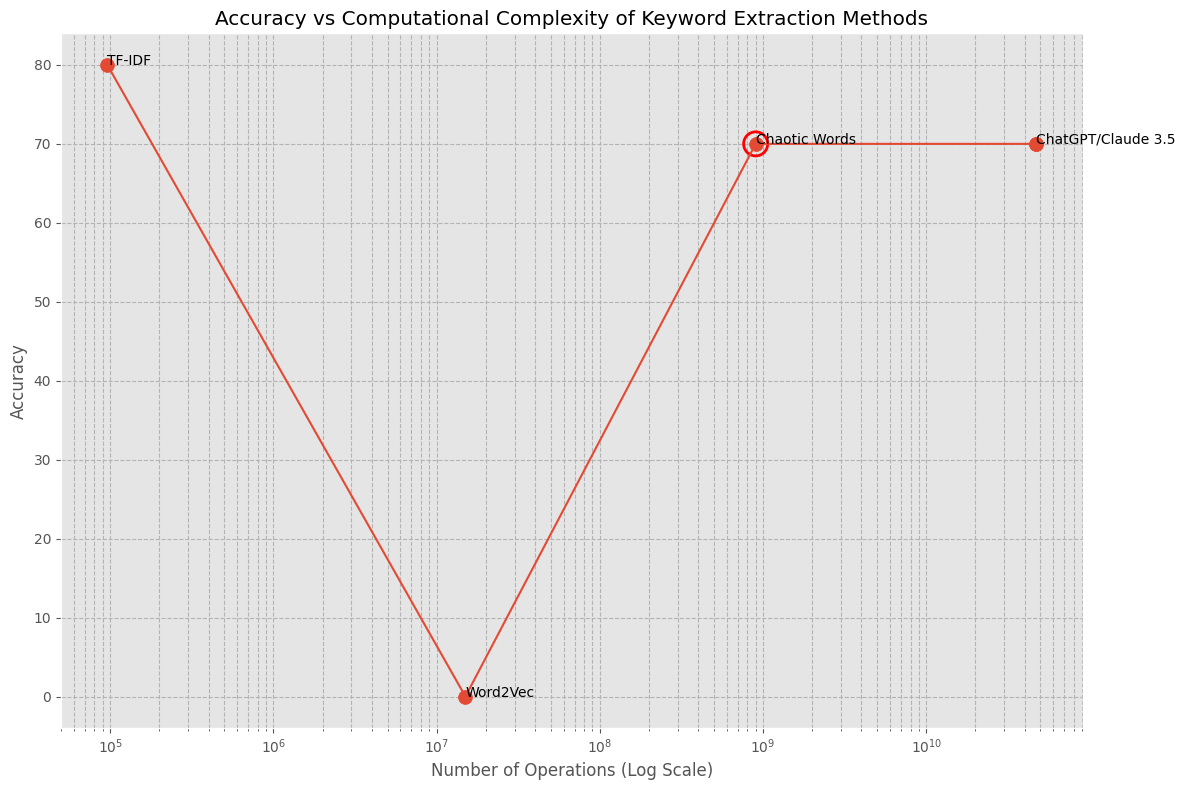

In [ ]:
import numpy as np

# Define the ground truth keywords
ground_truth = ["covid", "panicbuying", "grocerystore",  "supermarket",
    "toiletpaper", "food", "onlineshopping", "stockup", "price", "emptyshelves"]

# Define the extracted keywords for each method
tf_idf_keyword_list = tf_idf_keywords['word'].tolist()


word2vec_keywords_list = []
for i in range(len(top_words_word2vec)):
  word2vec_keywords_list.append(top_words_word2vec[i])

chaotic_keywords_list = chaotic_words
chatgpt_words = [
    "covid",
    "stockup",
    "panicbuying",
    "price",
    "handsanitizer",
    "food",
    "toiletpaper",
    "emptyshelves",
    "socialdistancing"
]
perplexity_keywords = [
    "covid", "panicbuying", "toiletpaper", "handsanitizer", "food",   "supermarket",
    "grocerystore", "stockmarket", "oilprices", "emptyshelves", "socialdistancing"
]

# Function to calculate accuracy
def calculate_accuracy(extracted_keywords, ground_truth):
    correct = len(set(extracted_keywords) & set(ground_truth))
    return correct*100 / len(ground_truth)

# Calculate accuracies
tf_idf_accuracy = calculate_accuracy(tf_idf_keyword_list, ground_truth)
word2vec_accuracy = calculate_accuracy(word2vec_keywords_list, ground_truth)
chaotic_words_accuracy = calculate_accuracy(chaotic_keywords_list, ground_truth)
chatgpt_words_accuracy = calculate_accuracy(chatgpt_words, ground_truth)
perplexity_keywords_accuracy = calculate_accuracy(perplexity_keywords, ground_truth)



# Print results
print(f"TF-IDF Accuracy: {tf_idf_accuracy:.4f}%")
print(f"Word2Vec Accuracy: {word2vec_accuracy:.4f}%")
print(f"Chaotic Words Accuracy: {chaotic_words_accuracy:.4f}%")
print(f"ChatGPT Words Accuracy: {chatgpt_words_accuracy:.4f}%")
print(f"Perplexity Words Accuracy: {perplexity_keywords_accuracy:.4f}%")

import matplotlib.pyplot as plt
import numpy as np

# Methods
methods = ['TF-IDF', 'Word2Vec', 'Chaotic Words', 'ChatGPT/Claude 3.5', ' ']

# Number of operations (complexity)
operations = [96000, 15000000, 900000000, 47185920000, 47185920000]

# Accuracies
accuracies = [
    tf_idf_accuracy,
    word2vec_accuracy,
    chaotic_words_accuracy,
    chatgpt_words_accuracy,
    perplexity_keywords_accuracy
]

# Creating the scatter plot
plt.figure(figsize=(12, 8))

# Plot scatter points and line graph
plt.scatter(operations, accuracies, s=100)
plt.plot(operations, accuracies, '-o')

# Customize the plot
plt.xscale('log')  # Using log scale for number of operations
plt.xlabel('Number of Operations (Log Scale)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Computational Complexity of Keyword Extraction Methods')

plt.grid(True, which="both", ls="--", c='0.7')

# Highlight the Chaotic Words method
chaotic_index = methods.index('Chaotic Words')
plt.scatter(operations[chaotic_index], accuracies[chaotic_index], s=300, facecolors='none', edgecolors='r', linewidth=2)

# Add labels with adjustText to prevent overlapping
texts = []
for i, method in enumerate(methods):
    texts.append(plt.text(operations[i], accuracies[i], method))


plt.tight_layout()
plt.show()